In [1]:
#import packages
import fermipy
from fermipy.gtanalysis import GTAnalysis
import astropy.io.fits as pyfits

If you get the following error, this is due to the python version. GTAnalysis requires python2.

<img src="error_pyV.png" style="width: 300px;" />

I created a new environment with python2 and activated fermipy there:

<img src="python2_fermi.png" style="width: 300px;" />

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image, display
from glob import glob

## Get the data from the LAT Data Server

Using the link:  https://fermi.gsfc.nasa.gov/cgi-bin/ssc/LAT/LATDataQuery.cgi

<img src="search_params.png" style="width: 300px;" />

<img src="searchresults.png" style="width: 300px;" />

In [3]:
#do this just once, otherwise one needs to regenerate the data and the links!!!!
#!curl -OL https://fermi.gsfc.nasa.gov/FTP/fermi/data/lat/queries/L190530050311EA31083E69_SC00.fits
#!curl -OL https://fermi.gsfc.nasa.gov/FTP/fermi/data/lat/queries/L190530050311EA31083E69_PH00.fits

## LAT Background Models - Updated

(https://fermi.gsfc.nasa.gov/ssc/data/access/lat/BackgroundModels.html) <br>

#### Galactic interstellar emission model
gll_iem_v06.fits --> gll_iem_v07.fits  <br>

#### Event Selection/IRF Name
Pass 8 Source (front+back, allPSF, allEDISP) P8R2_SOURCE_V6 -->Pass 8 Source (front+back, allPSF, allEDISP) P8R3_SOURCE_V2

#### Isotropic spectral template
iso_P8R2_SOURCE_V6_v06.txt --> iso_P8R3_SOURCE_V2_v1.txt




## Configuration File

The first step is to compose a configuration file that defines the data selection and analysis parameters. fermiPy uses the YAML format for its configuration files. The configuration file has a hierarchical organization that groups related parameters into separate dictionaries.

In [4]:
####data:  the input data set and spacecraft file for the analysis. 
#evfile: photon data
#scfile: spacecraft data

####binning: The parameters in the binning section define the dimensions of the ROI and the spatial and energy bin size.

####selection: section defines parameters related to the data selection (energy range, zmax cut, and event class/type). 
#The target parameter in this section defines the ROI center to have the same coordinates as the given source. 

####gtlike: performs unbinned or binned likelihood analysis of LAT data.

####model:The model section defines parameters related to the ROI model definition (diffuse templates, point sources).

config_text ="data: \n\
  evfile : L190530050311EA31083E69_PH00.fits\n\
  scfile : L190530050311EA31083E69_SC00.fits\n\
\n\
binning:\n\
  roiwidth   : 10.0\n\
  binsz      : 0.1\n\
  binsperdec : 8\n\
\n\
selection :\n\
  ra : 343.494812\n\
  dec : 16.1495\n\
  emin : 100\n\
  emax : 500000\n\
  zmax    : 90\n\
  evclass : 128\n\
  evtype  : 3\n\
  tmin    : 281318400\n\
  tmax    : 281923200\n\
  filter  : null\n\
  target : 3c454.3\n\
\n\
gtlike:\n\
  edisp : True\n\
  irfs : 'P8R3_SOURCE_V2'\n\
  edisp_disable : ['isodiff','galdiff']\n\
\n\
model:\n\
  src_roiwidth : 15.0\n\
  galdiff  : 'gll_iem_v07.fits'\n\
  isodiff  : 'iso_P8R3_SOURCE_V2_v1.txt'\n\
  catalogs : ['3FGL']";

with open("config.yaml",'w') as f:  
    f.write(config_text)


This gets everything ready for the likelihood analysis including instantiating the pylikelihood object. (If running again, one needs to delete the ccube.fits file, otherwise there is a error, if the rest of files exist, the procedure is skipped).

In [5]:
!rm ccube.fits
gta = GTAnalysis('config.yaml',logging={'verbosity' : 3})
gta.setup()

2019-05-30 11:44:20 INFO    GTAnalysis.__init__(): 
--------------------------------------------------------------------------------
fermipy version 0.17.3 
ScienceTools version ScienceTools-11-04-00
2019-05-30 11:44:23 INFO    GTAnalysis.setup(): Running setup.
2019-05-30 11:44:23 INFO    GTBinnedAnalysis.setup(): Running setup for component 00
2019-05-30 11:44:23 INFO    GTBinnedAnalysis.run_gtapp(): Running gtselect.
2019-05-30 11:44:23 INFO    GTBinnedAnalysis.run_gtapp(): time -p gtselect infile=L190530050311EA31083E69_PH00.fits outfile=/Users/hevjinyarar/Desktop/FermiLAT/3c454.3/ft1_00.fits ra=343.501800537 dec=16.1459007263 rad=7.57106781187 tmin=281318400.0 tmax=281923200.0 emin=100.0 emax=500000.0 zmin=0.0 zmax=90.0 evclass=128 evtype=3 convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=3 clobber=yes debug=no gui=no mode="ql"
2019-05-30 11:44:23 INFO    GTBinnedAnalysis.run_gtapp(): 
2019-05-30 11:44:23 INFO    GTBinnedAnalysis.run_gtapp(): WARNING: version mismatc

In [6]:
!ls -ltr *fits #the photon and spacecraft files + background file (gll_iem_v06) + all the generated files

-rw-r--r--@ 1 hevjinyarar  staff  498021120 May 19 16:05 gll_iem_v06.fits
-rw-r--r--  1 hevjinyarar  staff    2643840 May 30 11:33 L190530050311EA31083E69_SC00.fits
-rw-r--r--  1 hevjinyarar  staff     912960 May 30 11:33 L190530050311EA31083E69_PH00.fits
-rw-r--r--  1 hevjinyarar  staff     112320 May 30 11:34 fit0.fits
-rw-r--r--@ 1 hevjinyarar  staff  464817600 May 30 11:37 gll_iem_v07.fits
-rw-r--r--  1 hevjinyarar  staff     668160 May 30 11:44 ft1_00.fits
-rw-r--r--  1 hevjinyarar  staff   16548480 May 30 11:44 ltcube_00.fits
-rw-r--r--  1 hevjinyarar  staff    1229760 May 30 11:44 ccube_00.fits
-rw-r--r--  1 hevjinyarar  staff    8052480 May 30 11:45 bexpmap_00.fits
-rw-r--r--  1 hevjinyarar  staff    1258560 May 30 11:45 bexpmap_roi_00.fits
-rw-r--r--  1 hevjinyarar  staff   18639360 May 30 11:45 srcmap_00.fits
-rw-r--r--  1 hevjinyarar  staff    1209600 May 30 11:45 ccube.fits


(from fermipy tutorial)

* **ft1_00.fits**: Event list.  This is generated by running gtselect and gtmktime on our input file list.
* **bexpmap_00.fits**: All-sky binned exposure map.  This map is interpolated to create an exposure model when generating the srcmap file.
* **bexpmap_roi_00.fits**: Binned exposure map for the ROI.  This file is only provided for visualization purposes in order to have an exposure map with the same binning as the data and model maps.
* **ccube_00.fits**: Counts cube for the ROI.
* **ltcube_00.fits**: Livetime cube.  This contains a map of the livetime for this observation over the whole sky as a function of incidence angle.
* **srcmap_00.fits**: Source map cube.  This file contains maps for each of the components in the ROI after convolution with exposure and the PSF.  Note that energy dispersion is applied at run-time.

Note that all of the files have a numerical suffix '00'.  This is the analysis component index.  In a multi-component analysis there would be instances of all of the above files for each analysis component.  The files with no component index are co-added maps that are provided for visualization purposes.

To see example of one of these files we can open and plot the counts cube file.  This is a 3D cube that contains the distribution of events as a function of energy and two spatial coordinates.  In the example below we sum over the energy dimension of the cube to make a 2-D sky image.

Filename: ccube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      27   (100, 100, 30)   float32   
  1  EBOUNDS       1 BinTableHDU     22   30R x 4C   [I, E, E, E]   


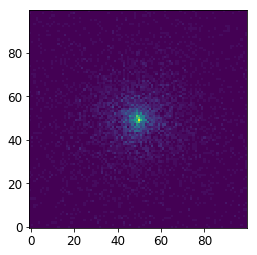

In [7]:
h = pyfits.open('ccube.fits')
h.info()
counts = h[0].data
counts.shape
plt.figure()
plt.imshow(np.sum(counts,axis=0),interpolation='nearest',origin='lower')
plt.show()

We can now inspect the state of the ROI prior with the print_roi() method.

In [8]:
gta.print_roi()

2019-05-30 11:52:16 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
3FGL J2254.0+1608   PointSource    PLSuperExpCuto    0.000       nan       895.0
3FGL J2250.3+1747   PointSource    PowerLaw          1.870       nan         9.4
3FGL J2246.2+1547   PointSource    PowerLaw          1.902       nan         3.9
3FGL J2254.0+1403   PointSource    PowerLaw          2.084       nan         2.6
3FGL J2305.8+1658   PointSource    PowerLaw          2.966       nan         4.7
3FGL J2307.7+1449   PointSource    PowerLaw          3.568       nan         6.4
3FGL J2243.9+2021   PointSource    PowerLaw          4.846       nan         9.7
3FGL J2314.0+1443   PointSource    PowerLaw          5.037       nan         1.1
3FGL J2318.6+1912   PointSource    PowerLaw          6.614       nan         1.4
3FGL J2232.5+1143   PointSource    LogParabola       6.8

Additional details about an individual source can be retrieved by printing the corresponding source object. Here we use the bracket operator to return the properties of 3c454.3

In [9]:
print(gta.roi['3c454.3'])

Name           : 3FGL J2254.0+1608
Associations   : ['3FGL J2254.0+1608', '3C 454.3', '1FHL J2253.9+1608', '2FGL J2253.9+1609', '1AGL J2254+1602', '3EG J2254+1601']
RA/DEC         :    343.502/    16.146
GLON/GLAT      :     86.121/   -38.192
TS             : nan
Npred          : 894.97
Flux           : 2.396e-06 +/-      nan
EnergyFlux     : 0.0007706 +/-      nan
SpatialModel   : PointSource
SpectrumType   : PLSuperExpCutoff
Spectral Parameters
Prefactor      :  1.194e-08 +/-        nan
Index1         :     -1.635 +/-        nan
Scale          :      412.7 +/-        nan
Cutoff         :      25.64 +/-        nan
Index2         :     0.2827 +/-        nan


## Likelihood Fitting

The first thing to do is free some of the sources since all of the sources are initially fixed. We'll just free those sources in the center region.

In [10]:
# Free Normalization of all Sources within 3 deg of ROI center
gta.free_sources(distance=3.0,pars='norm')

# Free all parameters of galactic diffuse components
gta.free_source('galdiff')

2019-05-30 11:52:25 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J2254.0+1608     : ['Prefactor']
2019-05-30 11:52:25 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J2250.3+1747     : ['Prefactor']
2019-05-30 11:52:25 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J2246.2+1547     : ['Prefactor']
2019-05-30 11:52:25 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J2254.0+1403     : ['Prefactor']
2019-05-30 11:52:25 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J2305.8+1658     : ['Prefactor']
2019-05-30 11:52:25 INFO    GTAnalysis.free_source(): Freeing parameters for isodiff               : ['Normalization']
2019-05-30 11:52:25 INFO    GTAnalysis.free_source(): Freeing parameters for galdiff               : ['Prefactor']
2019-05-30 11:52:25 INFO    GTAnalysis.free_source(): Freeing parameters for galdiff               : ['Index']


We are leaving the spectral shapes of sources fixed but we're going to free the spectral shape of the source we care about.

In [11]:
gta.free_source('3c454.3')

2019-05-30 11:52:27 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J2254.0+1608     : ['Index1', 'Cutoff']


Now, actually do the fit. The software does its best to get the fit to converge by running the fit several times.

In [12]:
fit_results = gta.fit()

2019-05-30 11:52:30 INFO    GTAnalysis.fit(): Starting fit.
/Users/hevjinyarar/anaconda3/envs/fermi/lib/python2.7/site-packages/scipy/interpolate/fitpack2.py:224: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
/Users/hevjinyarar/anaconda3/envs/fermi/lib/python2.7/site-packages/scipy/interpolate/fitpack2.py:224: UserWarning: 
A theoretically impossible result was found during the iteration
proces for finding a smoothing spline with fp = s: s too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
/Users/hevjinyarar/anaconda3/envs/fermi/lib/python2.7/site-packages/fermipy/utils.py:785: RuntimeWa

In [13]:
print('Fit Quality: ',fit_results['fit_quality'])
print(gta.roi['3c454.3'])

('Fit Quality: ', 3)
Name           : 3FGL J2254.0+1608
Associations   : ['3FGL J2254.0+1608', '3C 454.3', '1FHL J2253.9+1608', '2FGL J2253.9+1609', '1AGL J2254+1602', '3EG J2254+1601']
RA/DEC         :    343.502/    16.146
GLON/GLAT      :     86.121/   -38.192
TS             : 14048.38
Npred          : 5406.81
Flux           :  1.42e-05 +/- 3.06e-07
EnergyFlux     :  0.004818 +/-  0.00011
SpatialModel   : PointSource
SpectrumType   : PLSuperExpCutoff
Spectral Parameters
Prefactor      :  7.006e-08 +/-  2.109e-08
Index1         :     -1.595 +/-    0.09312
Scale          :      412.7 +/-        nan
Cutoff         :      27.41 +/-      13.06
Index2         :     0.2827 +/-        nan


Save the state of the roi to an output file for reference later. The write_roi function does this. The first argument is a string that will be pre-pended to the names of the output files generated by this method.

In [14]:
gta.write_roi('fit0',make_plots=True)

2019-05-30 11:52:42 INFO    GTBinnedAnalysis.write_xml(): Writing /Users/hevjinyarar/Desktop/FermiLAT/3c454.3/fit0_00.xml...
2019-05-30 11:52:42 INFO    GTAnalysis.write_fits(): Writing /Users/hevjinyarar/Desktop/FermiLAT/3c454.3/fit0.fits...
2019-05-30 11:52:43 INFO    GTAnalysis.write_roi(): Writing /Users/hevjinyarar/Desktop/FermiLAT/3c454.3/fit0.npy...


There are a lot of diagnostic plots also saved at the same time.

In [1]:
ls -ltr fit0*.png

-rw-r--r--  1 hevjinyarar  staff  56881 May 30 11:52 fit0_model_map_2.000_5.699.png
-rw-r--r--  1 hevjinyarar  staff  54919 May 30 11:52 fit0_counts_map_2.000_5.699.png
-rw-r--r--  1 hevjinyarar  staff  23417 May 30 11:52 fit0_counts_map_xproj_2.000_5.699.png
-rw-r--r--  1 hevjinyarar  staff  23056 May 30 11:52 fit0_counts_map_yproj_2.000_5.699.png
-rw-r--r--  1 hevjinyarar  staff  42659 May 30 11:52 fit0_counts_spectrum.png


In [17]:
pngs = glob('fit0*.png')

fit0_counts_spectrum.png

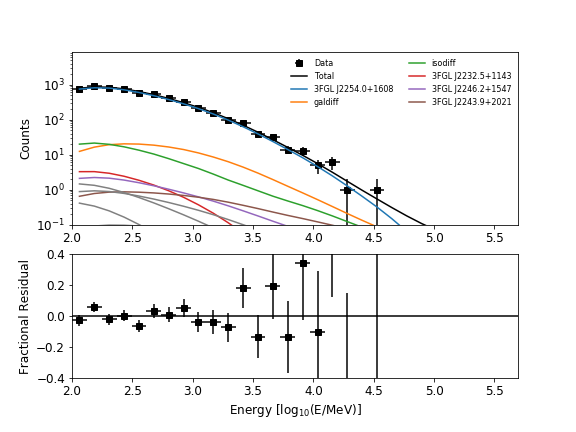

 None


In [18]:
### 
print(pngs[0]),display(Image(pngs[0]))  

fit0_model_map_2.000_5.699.png

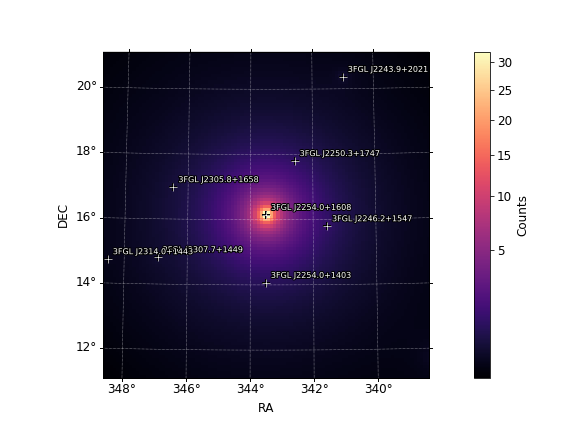

 None


In [19]:
print(pngs[1]),display(Image(pngs[1])) 

fit0_counts_map_2.000_5.699.png

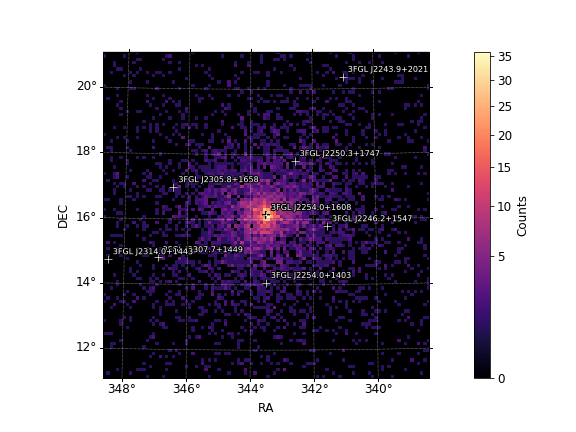

 None


In [20]:
print(pngs[2]),display(Image(pngs[2]))

fit0_counts_map_xproj_2.000_5.699.png

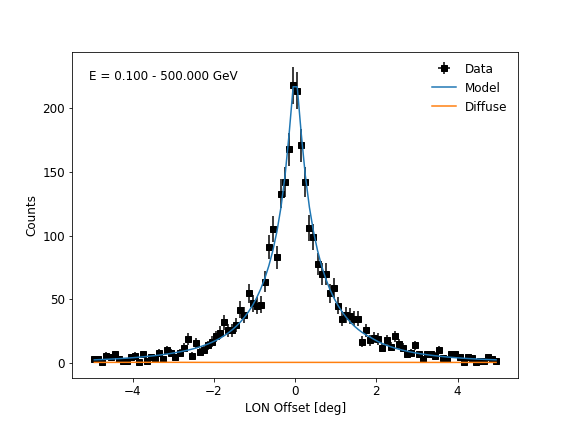

 None


In [21]:
print(pngs[3]),display(Image(pngs[3])) 

fit0_counts_map_yproj_2.000_5.699.png

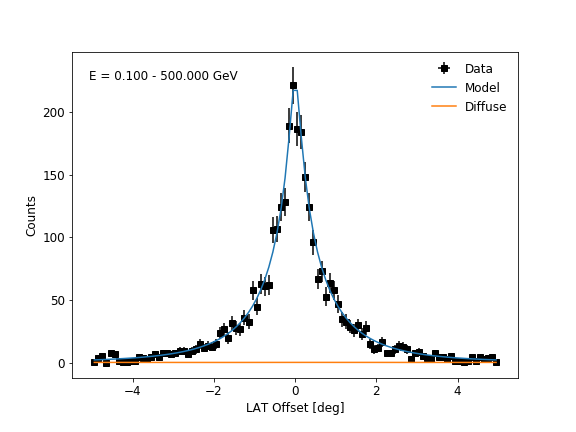

 None


In [22]:
print(pngs[4]),display(Image(pngs[4])) 

## Reading the results from the output python file

In [23]:
py = np.load('fit0.npy').flat[0]

For example "sources" dictionary has an entry for each source in the model

In [24]:
sorted(py['sources'].keys())

['3FGL J2229.1+2255',
 '3FGL J2232.5+1143',
 '3FGL J2234.8+0945',
 '3FGL J2243.9+2021',
 '3FGL J2246.2+1547',
 '3FGL J2250.3+1747',
 '3FGL J2254.0+1403',
 '3FGL J2254.0+1608',
 '3FGL J2305.8+1658',
 '3FGL J2307.7+1449',
 '3FGL J2314.0+1443',
 '3FGL J2318.6+1912',
 'galdiff',
 'isodiff']

Some values for 3c454.3:

In [25]:
## flux
py['sources']['3FGL J2254.0+1608']['flux']

1.4202986377990358e-05

In [26]:
## spectral parameters
print(py['sources']['3FGL J2254.0+1608']['param_names'][:4]) #the rest is empty
print(py['sources']['3FGL J2254.0+1608']['param_values'][:4])

['Prefactor' 'Index1' 'Scale' 'Cutoff']
[  7.00629539e-08  -1.59457846e+00   4.12746826e+02   2.74118843e+01]


In [27]:
## test statistic
print(py['sources']['3FGL J2254.0+1608']['ts'])

14048.3819123
